In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper functions

def get_haplotypes(matrix, start_col, end_col):
    """Extract left and right haplotypes for individuals."""
    nsnp = matrix.shape[0]
    left_haplotypes = []
    right_haplotypes = []

    for col in range(start_col, end_col):
        left = np.zeros(nsnp)
        left[(matrix.iloc[:, col] == "1|0") | (matrix.iloc[:, col] == "1|1")] = 1
        right = np.zeros(nsnp)
        right[(matrix.iloc[:, col] == "0|1") | (matrix.iloc[:, col] == "1|1")] = 1
        left_haplotypes.append(left)
        right_haplotypes.append(right)
    
    return np.array(left_haplotypes).T, np.array(right_haplotypes).T

def allele_frequency_spectrum(haplotypes):
    """Compute allele frequency spectrum for given haplotypes."""
    alt_counts = np.sum(haplotypes, axis=1)
    unique, counts = np.unique(alt_counts.astype(int), return_counts=True)  # Ensure unique values are integers
    spectrum = np.zeros(haplotypes.shape[1] * 2 + 1, dtype=int)
    spectrum[unique] = counts
    return spectrum

def plot_allele_spectrum(spectrum, title="Allele Frequency Spectrum"):
    """Plot allele frequency spectrum, excluding SNPs with 0 ALT alleles."""
    plt.bar(range(1, len(spectrum)), spectrum[1:])  # Exclude 0 ALT alleles
    plt.xlabel("Number of ALT alleles")
    plt.ylabel("Number of SNPs")
    plt.title(title)
    plt.show()

# Load the dataset
df = pd.read_csv("abbgen1k.csv")

# Question 1: Total Number of SNPs
total_snps = df.shape[0]
print("Question 1: Total Number of SNPs")
print()
print("Total number of SNPs:", total_snps)


Question 1: Total Number of SNPs

Total number of SNPs: 15912


Question 2: Compute the allele frequency spectrum (European individuals)

European Allele Frequency Spectrum: [7953 1738  668  379  364  210  163  163   95  119  111   91   85  137
   61   66  107   54   52   57   46   43   27   48   32   46   74   56
   34   51   48   20   35   32   77   31   39   52   29   15   16   35
   53   36   39   20   30   24   39   26   19   18   16   32   13   26
   18   25   17   20   81   34   16   12   16   47  120   30   44   10
   16   10   12   19   11   21   31   24   18   21   35   15   18   21
   30   19   49   18   28   23   21   10   17   16   33   34   28   25
   14   20   10    9    6   16    0    9   16   17   13   34   15   31
    5    5   13   14   11   10   11   12    5   11    5    7   23   20
   10   10    8   13   20   13   14    5   80   28   12   35   18    9
   15   16    7   15    7    1   12    1    1    1   10    9    0    3
    2    7   27    4   12    3    8    0   51    0    0    0    0    0
    0    0    0    0    0    0    0   

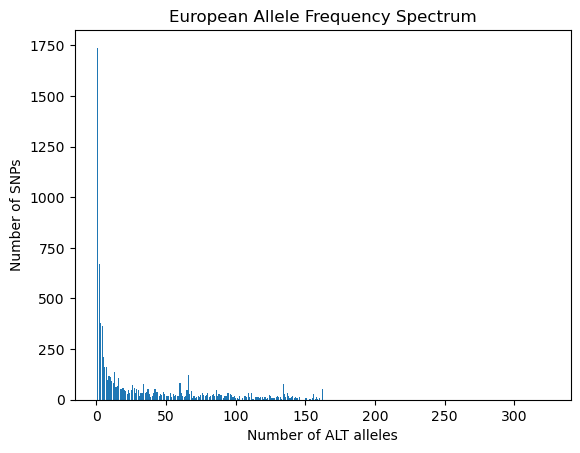

In [10]:

# Question 2: Allele Frequency Spectrum for Europeans
# Extract European data (columns 9:90)
european_data = df.iloc[:, 9:90]
left_europe, right_europe = get_haplotypes(european_data, 0, european_data.shape[1])

# Combine left and right haplotypes for allele frequency counts
european_haplotypes = np.hstack((left_europe, right_europe))

european_spectrum = allele_frequency_spectrum(european_haplotypes)
print("Question 2: Compute the allele frequency spectrum (European individuals)")
print()
print("European Allele Frequency Spectrum:", european_spectrum)

# Plot the spectrum for Europeans, excluding SNPs with 0 ALT alleles
plot_allele_spectrum(european_spectrum, "European Allele Frequency Spectrum")


Question 2 

(q)Compute the allele frequency spectrum just for the European individuals. How many SNPs have 0 ALT alleles (these SNPs are not polymorphic in the European sample, everyone has the REF allele)? How many SNPs have 162 ALT alleles (these SNPs are also not polymorphic in the European sample, everyone has the ALT allele)? Make a bar plot of the allele frequency spectrum: number of haplotypes on the x-axis and the number of SNPs on the y-axis. Do NOT include the number of SNPs with 0 ALT alleles in the figure (it will distort the figure).

(a) There are 171 SNPS that have 0 ALT alleles, whereas there are 0 SNPs with the 162 ALT allele.

Question 3: Allele Frequency Spectrum for Africans
African Allele Frequency Spectrum: [3207 2672 1156 1046  577  456  377  383  297  219  198  198  200  163
  151  161   93   87  102   88   84  110  126   92  133   77   69   67
   65   61   40   45   83   66   62   42   54   45   35   37   44   52
   39   33   36   44   49   43   34   26   27   26   24   45   98   25
   28   23   21   19   23   26   18   14   17   12   18   76   31   34
   22   15   17   14   19   29   20   18   17   23   21   20   10   15
   10   16   18   33   18   11   16   19   10   21    7    9    9   13
   16   23    6    9    6   31   11    6   14   10    8   14   17   18
    9   11   19   40   17   25   12    6   24    4   28    6    6   12
   18    9   15    7    9   21   18   12   20   20   15   10    4   19
    6   14   11   12   12    4    9   10   15   11    9    6   19   13
   14   17   10    6   10    2   16    2    9    5   13    9    6   13
   14   11   11   24   28    8    3   20    8   15  183    0  

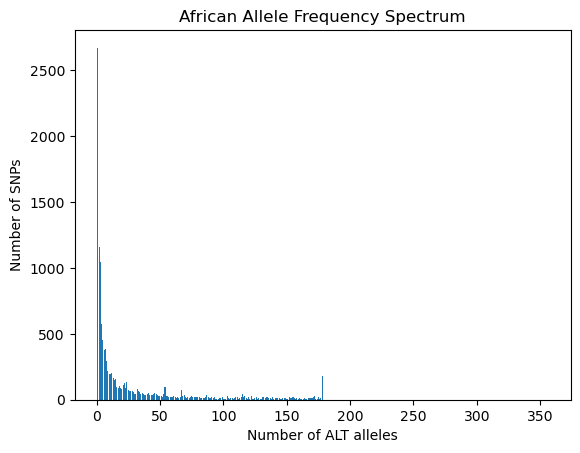

In [13]:
# Question 3: Allele Frequency Spectrum for Africans
# Extract African data (columns 90:179)
african_data = df.iloc[:, 90:179]
left_africa, right_africa = get_haplotypes(african_data, 0, african_data.shape[1])

# Combine left and right haplotypes for allele frequency counts
african_haplotypes = np.hstack((left_africa, right_africa))
african_spectrum = allele_frequency_spectrum(african_haplotypes)
print("Question 3: Allele Frequency Spectrum for Africans")
print("African Allele Frequency Spectrum:", african_spectrum)

# Plot the spectrum for Africans, excluding SNPs with 0 ALT alleles
plot_allele_spectrum(african_spectrum, "African Allele Frequency Spectrum")


Question 3

(q)Compute the allele frequency spectrum just for the African individuals. How many SNPs have 0 ALT alleles (these SNPs are not polymorphic in the African sample, everyone has the REF allele)? How many SNPs have 178 ALT alleles (these SNPs are also not polymorphic in the African sample, everyone has the ALT allele)? Make a bar plot of the allele frequency spectrum: number of haplotypes on the x-axis and the number of SNPs on the y-axis. Do NOT include the number of SNPs with 0 ALT alleles in the figure (it will distort the figure).

(a)There are 182 SNPs with 0 ALT alleles and no entries with 178 ALT alleles.

In [12]:

# Question 4: Bootstrap 95% Confidence Interval for Average Pairwise Diversity
def average_pairwise_diversity(haplotypes, num_pairs=50):
    """Compute the average pairwise diversity by sampling pairs of haplotypes."""
    pi_values = []
    num_haplotypes = haplotypes.shape[1]
    
    for _ in range(num_pairs):
        # Randomly choose two haplotypes and compute diversity
        i, j = np.random.choice(num_haplotypes, size=2, replace=False)
        pi = np.mean(haplotypes[:, i] != haplotypes[:, j])
        pi_values.append(pi)
    
    return np.mean(pi_values)

def bootstrap_confidence_interval(haplotypes, num_bootstraps=100, num_pairs=50):
    """Calculate the bootstrap 95% confidence interval for average pairwise diversity."""
    diversity_estimates = [average_pairwise_diversity(haplotypes, num_pairs) for _ in range(num_bootstraps)]
    diversity_estimates.sort()
    lower_bound = diversity_estimates[2]
    upper_bound = diversity_estimates[97]
    return lower_bound, upper_bound

print("Question 4: Bootstrap 95% Confidence Interval for Average Pairwise Diversity")

# Confidence interval for Europeans
europe_ci = bootstrap_confidence_interval(european_haplotypes)
print("95% CI for European average pairwise diversity:", europe_ci)

# Confidence interval for Africans
africa_ci = bootstrap_confidence_interval(african_haplotypes)
print("95% CI for African average pairwise diversity:", africa_ci)

# Interpretation: Compare the results between European and African samples
if europe_ci[1] < africa_ci[0]:
    print("The results suggest that average pairwise diversity is lower in Europe than in Africa, consistent with the out-of-Africa hypothesis.")
else:
    print("The results do not clearly show lower diversity in Europe.")

Question 4: Bootstrap 95% Confidence Interval for Average Pairwise Diversity
95% CI for European average pairwise diversity: (0.08962921065862242, 0.09688411261940671)
95% CI for African average pairwise diversity: (0.11051533433886375, 0.11662770236299647)
The results suggest that average pairwise diversity is lower in Europe than in Africa, consistent with the out-of-Africa hypothesis.
